<a href="https://colab.research.google.com/github/lenkaflorienkaa/pcvkganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import math
import os
import glob
import matplotlib.pyplot as plt

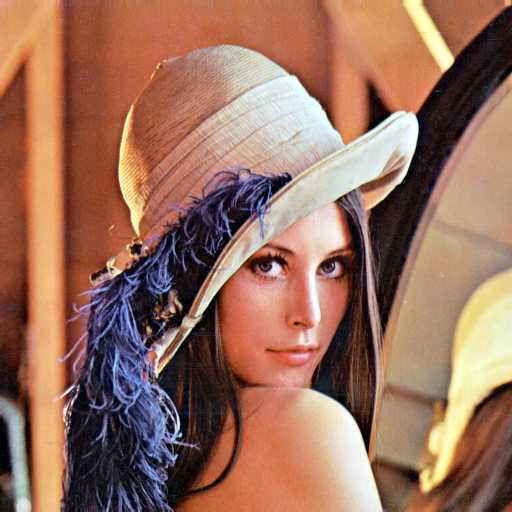

In [4]:
lena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
cv2_imshow(lena)

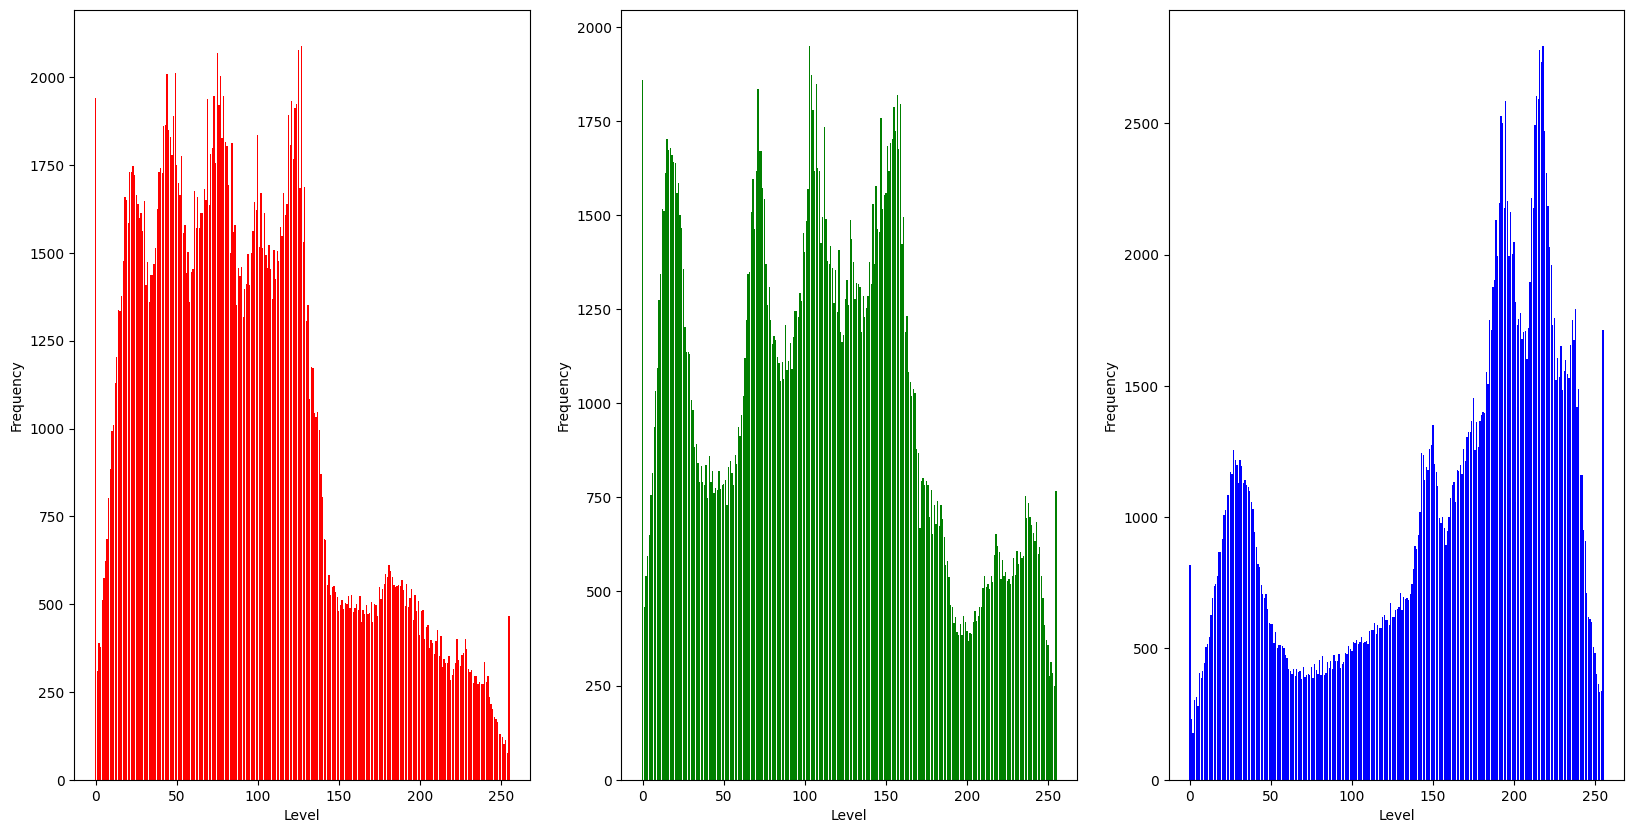

In [7]:
import matplotlib.pyplot as plt

def histogram_red(image):
  red = image[:,:,0].flatten()
  red_hist = np.zeros(256, dtype=int)
  for i in red:
    red_hist[i] += 1
  return red_hist

def histogram_green(image):
    green = image[:,:,1].flatten()
    green_hist = np.zeros(256, dtype=int)
    for i in green:
        green_hist[i] += 1
    return green_hist

def histogram_blue(image):
    blue = image[:,:,2].flatten()
    blue_hist = np.zeros(256, dtype=int)
    for i in blue:
        blue_hist[i] += 1
    return blue_hist

red_hist = histogram_red(lena)
green_hist = histogram_green(lena)
blue_hist = histogram_blue(lena)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.bar(np.arange(256), red_hist, color='red')
plt.xlabel('Level')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), green_hist, color='green')
plt.xlabel('Level')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), blue_hist, color='blue')
plt.xlabel('Level')
plt.ylabel('Frequency')

plt.show()

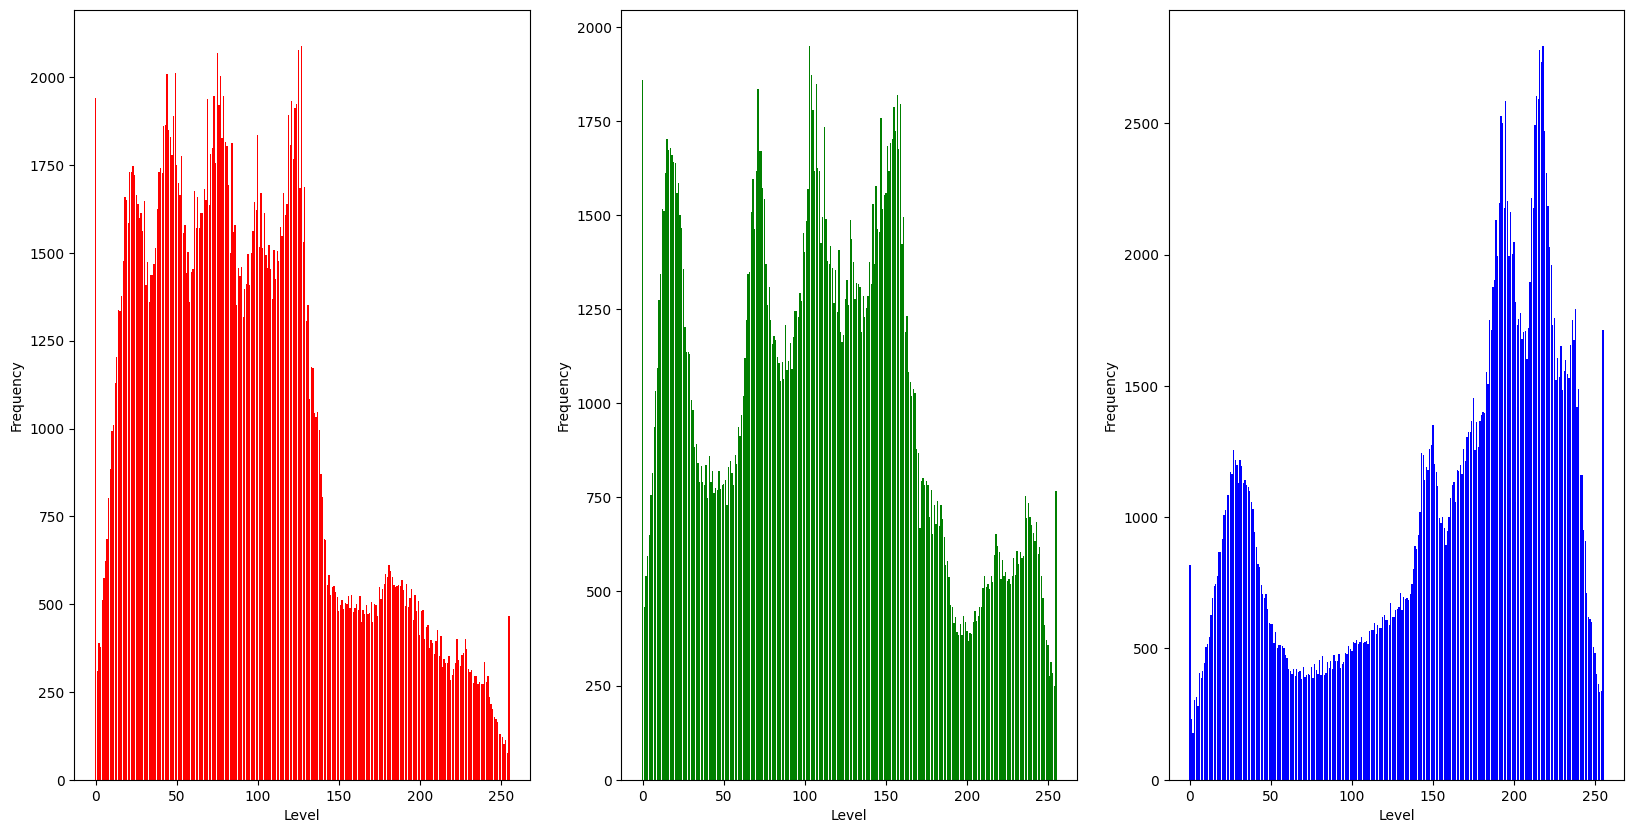

In [8]:
def histogram_np(image):
    red = image[:,:,0].flatten()
    green = image[:,:,1].flatten()
    blue = image[:,:,2].flatten()
    red_hist = np.histogram(red, bins=256, range=(0, 256))
    green_hist = np.histogram(green, bins=256, range=(0, 256))
    blue_hist = np.histogram(blue, bins=256, range=(0, 256))
    return red_hist, green_hist, blue_hist

red_hist_np, green_hist_np, blue_hist_np = histogram_np(lena)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.bar(np.arange(256), red_hist_np[0], color='red')
plt.xlabel('Level')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), green_hist_np[0], color='green')
plt.xlabel('Level')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), blue_hist_np[0], color='blue')
plt.xlabel('Level')
plt.ylabel('Frequency')

plt.show()


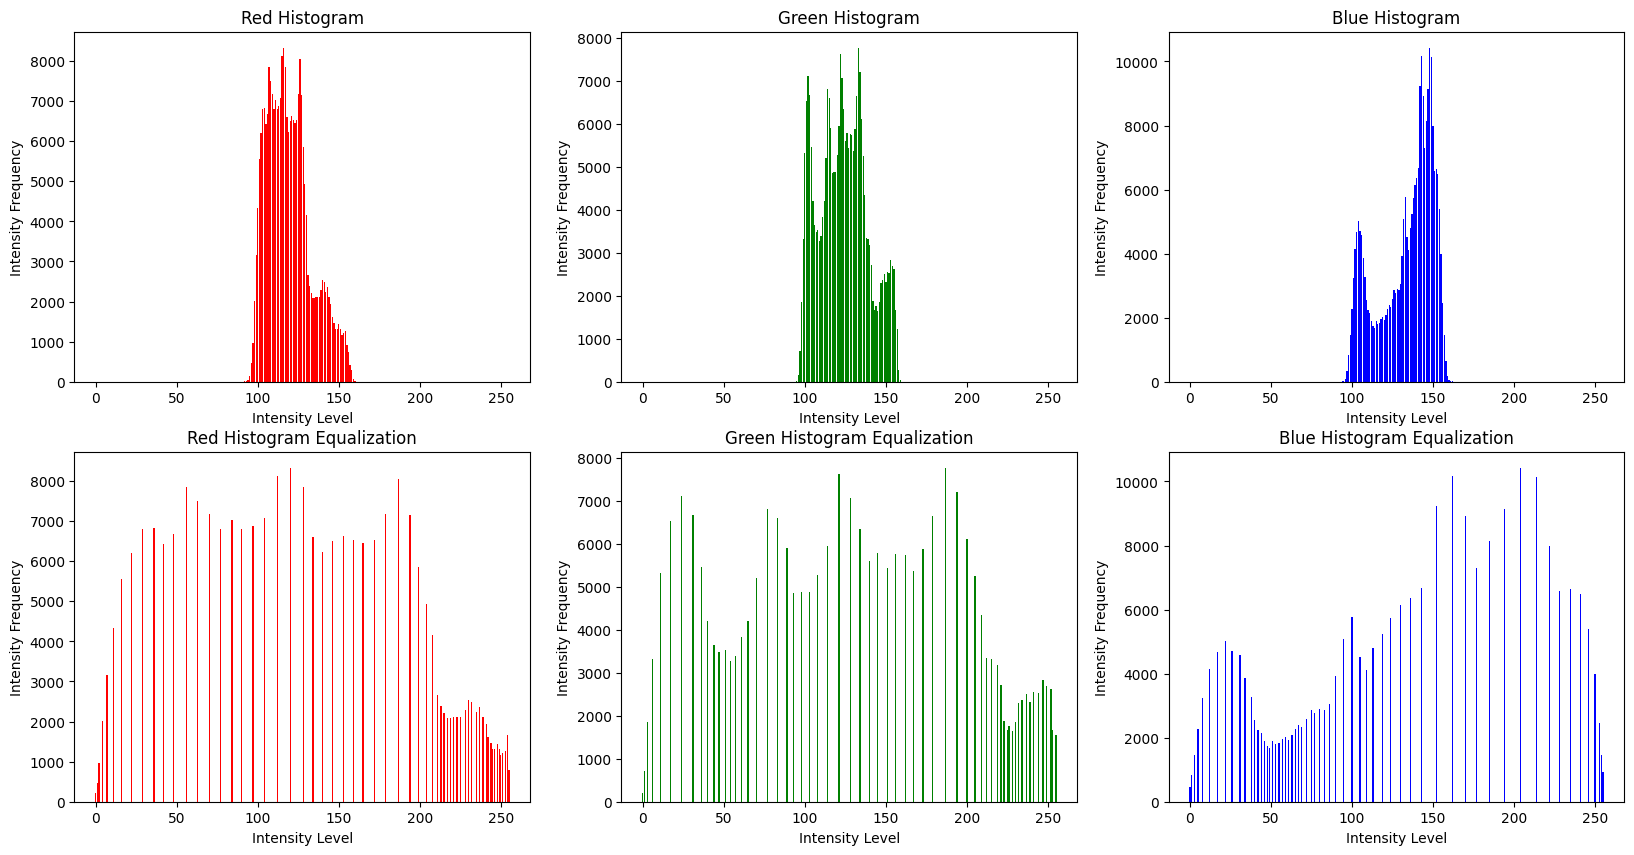

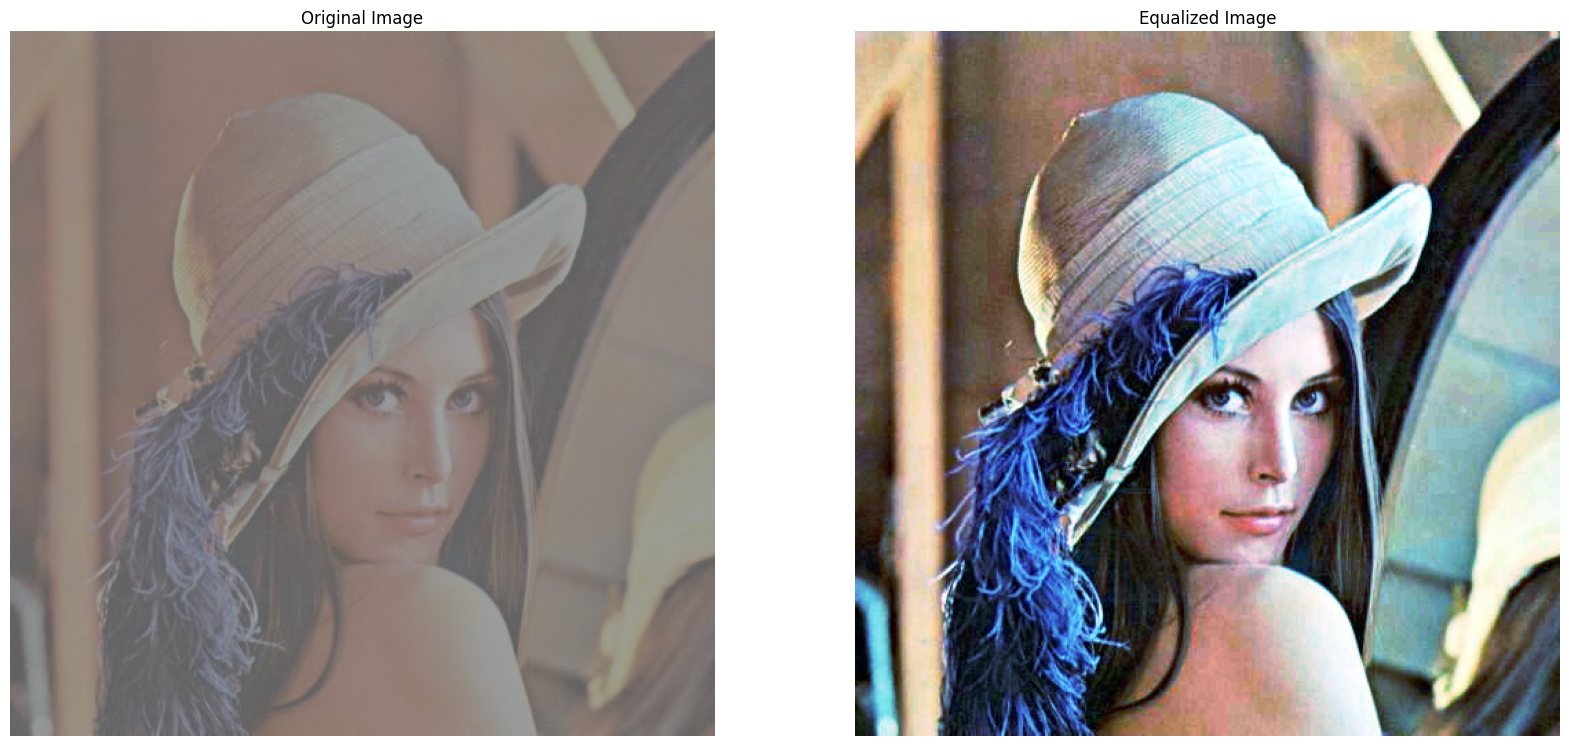

In [17]:
lena_lc = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
def histogram_equalization(image):
    red = image[:,:,0].flatten()
    green = image[:,:,1].flatten()
    blue = image[:,:,2].flatten()
    red_hist = np.zeros(256, dtype=int)
    green_hist = np.zeros(256, dtype=int)
    blue_hist = np.zeros(256, dtype=int)
    for i in red:
        red_hist[i] += 1
    for i in green:
        green_hist[i] += 1
    for i in blue:
        blue_hist[i] += 1
    return red_hist, green_hist, blue_hist

red_hist_lc, green_hist_lc, blue_hist_lc = histogram_equalization(lena_lc)

def cumulative_histogram(hist):
    cum_hist = np.zeros(256, dtype=int)
    cum_hist[0] = hist[0]
    for i in range(1, 256):
        cum_hist[i] = cum_hist[i-1] + hist[i]
    return cum_hist

red_cum_hist = cumulative_histogram(red_hist_lc)
green_cum_hist = cumulative_histogram(green_hist_lc)
blue_cum_hist = cumulative_histogram(blue_hist_lc)

def normalize_cumulative_histogram(cum_hist, image):
    norm_cum_hist = np.zeros(256, dtype=float)
    for i in range(256):
        norm_cum_hist[i] = cum_hist[i] / (image.shape[0] * image.shape[1])
    return norm_cum_hist

red_norm_cum_hist = normalize_cumulative_histogram(red_cum_hist, lena_lc)
green_norm_cum_hist = normalize_cumulative_histogram(green_cum_hist, lena_lc)
blue_norm_cum_hist = normalize_cumulative_histogram(blue_cum_hist, lena_lc)

def scale_color(norm_cum_hist):
    k0 = np.zeros(256, dtype=int)
    for i in range(256):
        k0[i] = round(norm_cum_hist[i] * 255)
    return k0

red_k0 = scale_color(red_norm_cum_hist)
green_k0 = scale_color(green_norm_cum_hist)
blue_k0 = scale_color(blue_norm_cum_hist)

def histogram_equalization_image(image, k0_red, k0_green, k0_blue):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    red_eq = np.zeros_like(red)
    green_eq = np.zeros_like(green)
    blue_eq = np.zeros_like(blue)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red_eq[i][j] = k0_red[red[i][j]]
            green_eq[i][j] = k0_green[green[i][j]]
            blue_eq[i][j] = k0_blue[blue[i][j]]
    return red_eq, green_eq, blue_eq

red_eq, green_eq, blue_eq = histogram_equalization_image(lena_lc, red_k0, green_k0, blue_k0)

red_hist_eq, green_hist_eq, blue_hist_eq = histogram_equalization(cv.merge([red_eq, green_eq, blue_eq]))

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.bar(np.arange(256), red_hist_lc, color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 2)
plt.bar(np.arange(256), green_hist_lc, color='green')
plt.title('Green Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 3)
plt.bar(np.arange(256), blue_hist_lc, color='blue')
plt.title('Blue Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 4)
plt.bar(np.arange(256), red_hist_eq, color='red')
plt.title('Red Histogram Equalization')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 5)
plt.bar(np.arange(256), green_hist_eq, color='green')
plt.title('Green Histogram Equalization')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 6)
plt.bar(np.arange(256), blue_hist_eq, color='blue')
plt.title('Blue Histogram Equalization')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.show()

lena_lc_rgb = cv.cvtColor(lena_lc, cv.COLOR_BGR2RGB)
lena_eq = cv.merge([red_eq, green_eq, blue_eq])
lena_eq_rgb = cv.cvtColor(lena_eq, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(lena_lc_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena_eq_rgb)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

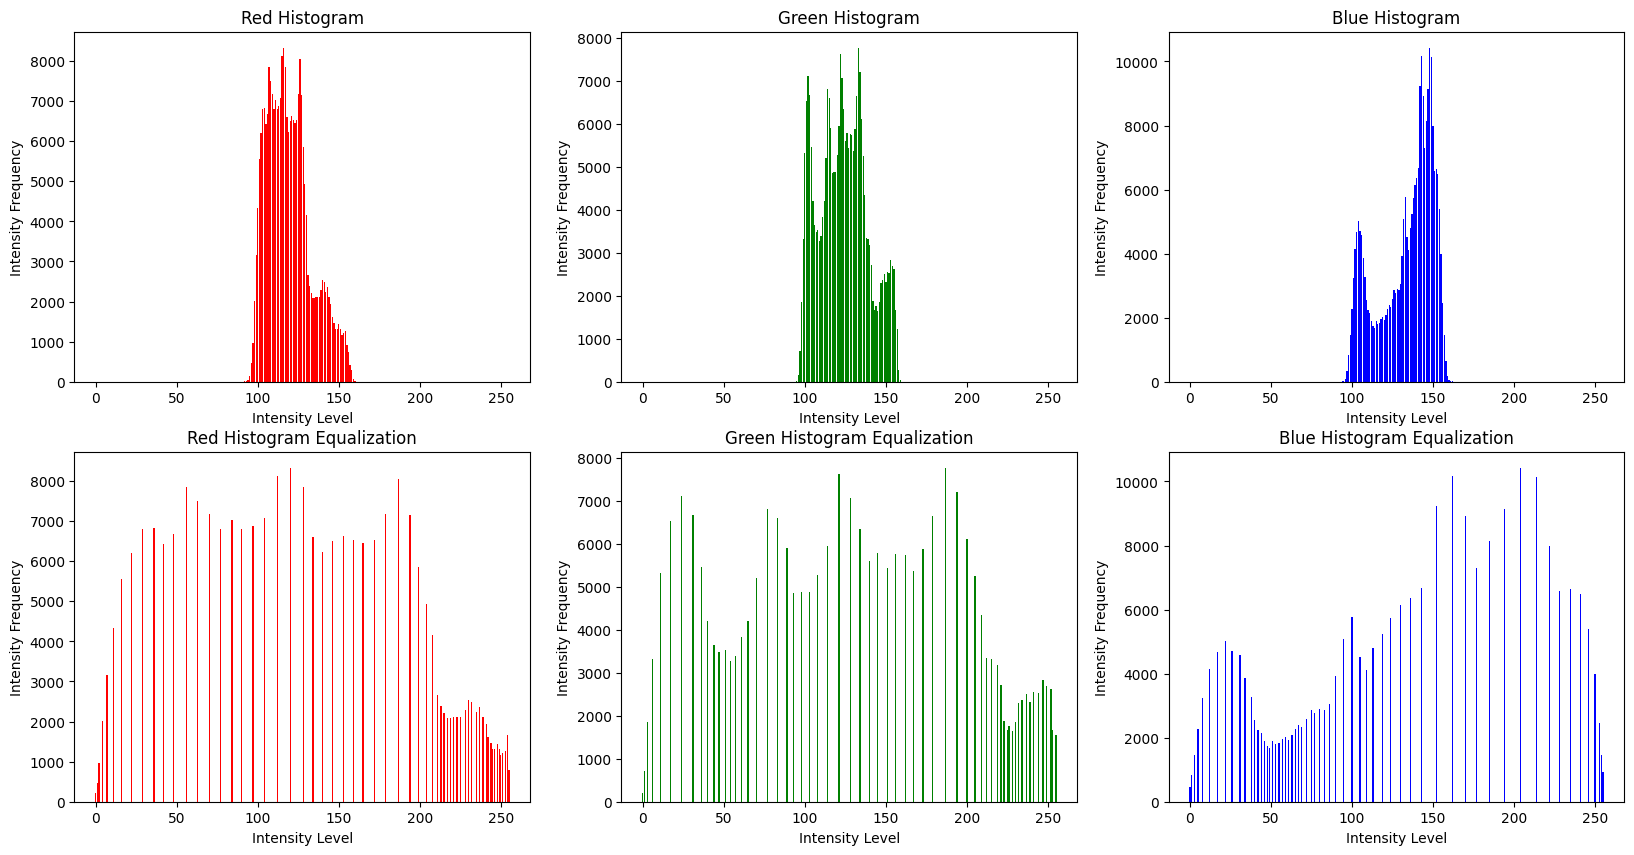

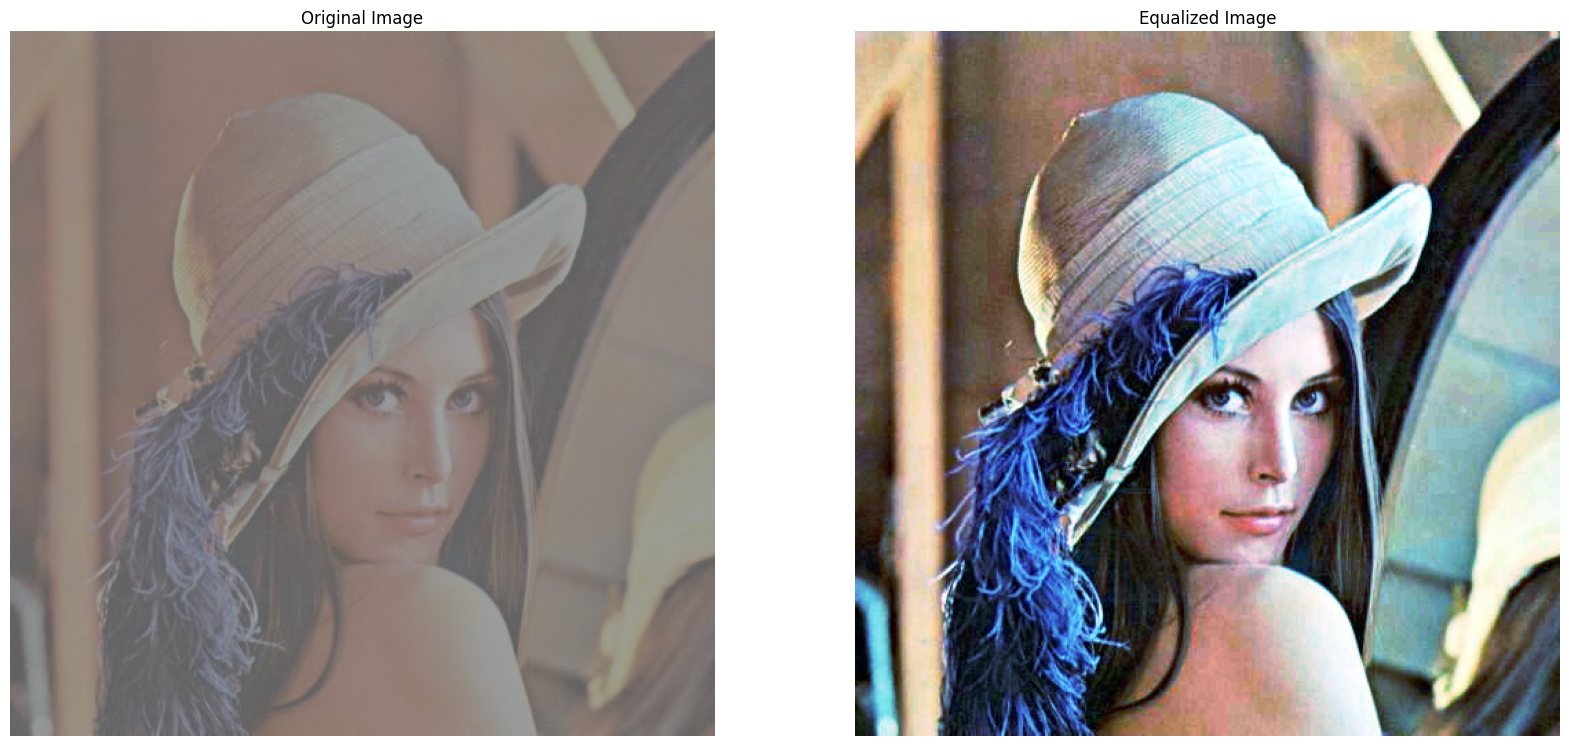

In [16]:
def histogram_equalization_cv2(image):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    red_eq = cv.equalizeHist(red)
    green_eq = cv.equalizeHist(green)
    blue_eq = cv.equalizeHist(blue)
    return red_eq, green_eq, blue_eq

red_eq_cv2, green_eq_cv2, blue_eq_cv2 = histogram_equalization_cv2(lena_lc)

red_hist_eq_cv2 = histogram_red(cv.merge([red_eq_cv2, green_eq_cv2, blue_eq_cv2]))

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.bar(np.arange(256), red_hist_lc, color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 2)
plt.bar(np.arange(256), green_hist_lc, color='green')
plt.title('Green Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 3)
plt.bar(np.arange(256), blue_hist_lc, color='blue')
plt.title('Blue Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 4)
plt.bar(np.arange(256), red_hist_eq_cv2, color='red')
plt.title('Red Histogram Equalization')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 5)
plt.bar(np.arange(256), green_hist_eq, color='green')
plt.title('Green Histogram Equalization')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(2, 3, 6)
plt.bar(np.arange(256), blue_hist_eq, color='blue')
plt.title('Blue Histogram Equalization')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.show()

lena_eq_cv2 = cv.merge([red_eq_cv2, green_eq_cv2, blue_eq_cv2])
lena_eq_cv2_rgb = cv.cvtColor(lena_eq_cv2, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(lena_lc_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena_eq_cv2_rgb)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

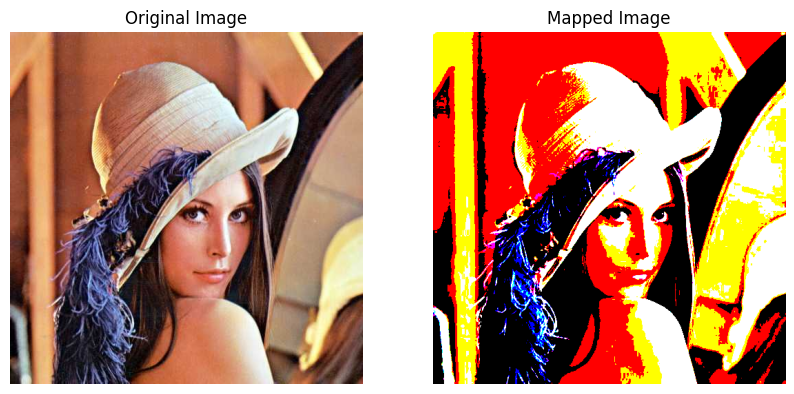

In [11]:
lena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
lena_bgr = cv.cvtColor(lena, cv.COLOR_RGB2BGR)
# Pemetaan 16 juta warna RGB ke dalam 8 warna
def mapping_color(image):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if red[i][j] < 128:
                red[i][j] = 0
            else:
                red[i][j] = 255
            if green[i][j] < 128:
                green[i][j] = 0
            else:
                green[i][j] = 255
            if blue[i][j] < 128:
                blue[i][j] = 0
            else:
                blue[i][j] = 255
    return red, green, blue

red_map, green_map, blue_map = mapping_color(lena)

# Citra hasil pemetaan 16 juta warna RGB ke dalam 8 warna
lena_map = cv.merge([red_map, green_map, blue_map])
lena_map_rgb = cv.cvtColor(lena_map, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_bgr)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena_map_rgb)
plt.axis('off')

plt.show()

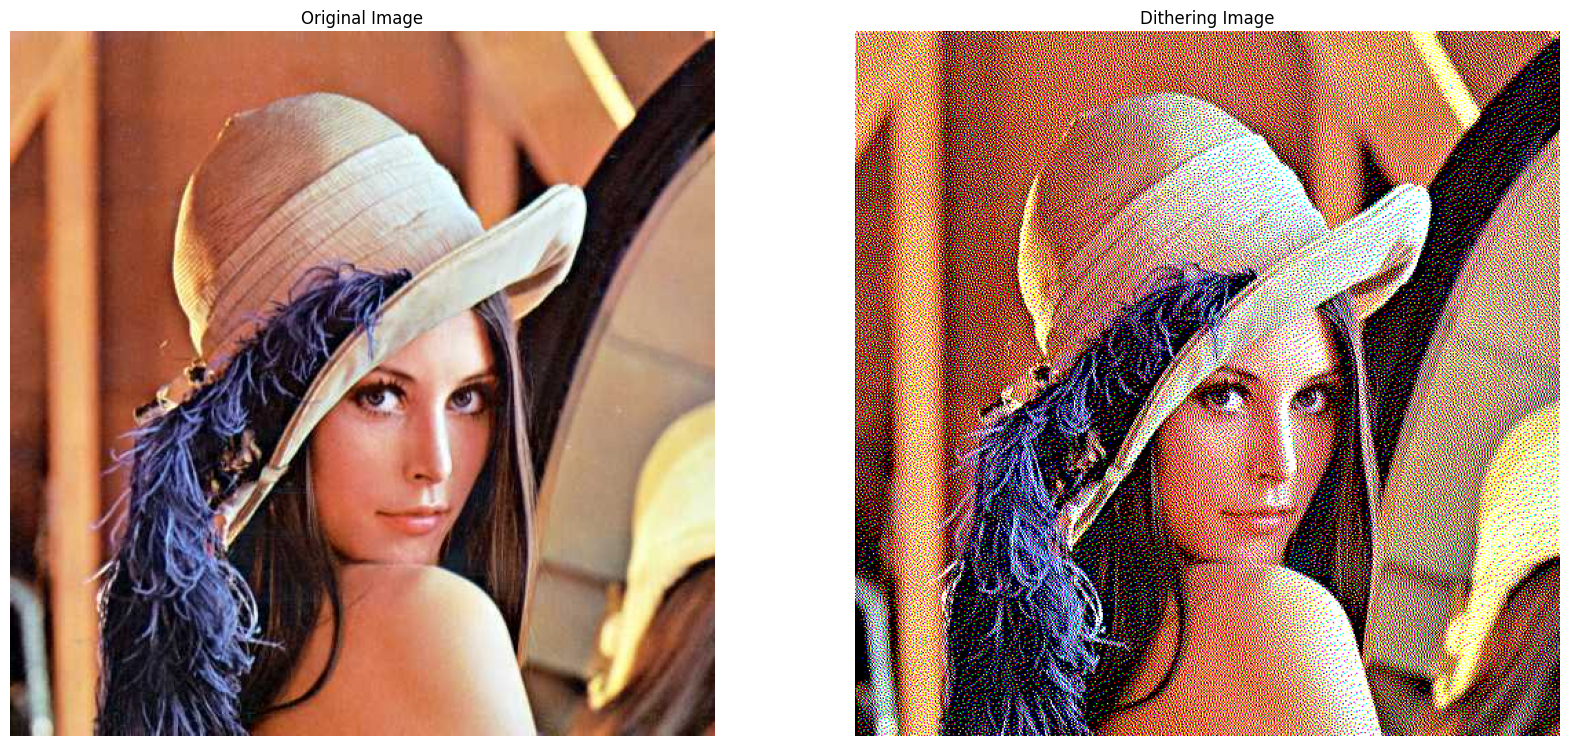

In [12]:
lena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

def floyd_steinberg_dithering_rgb(image):
    b_channel, g_channel, r_channel = cv.split(image)

    b_dithered = floyd_steinberg_dithering(b_channel)
    g_dithered = floyd_steinberg_dithering(g_channel)
    r_dithered = floyd_steinberg_dithering(r_channel)

    return cv.merge([b_dithered, g_dithered, r_dithered])

def floyd_steinberg_dithering(channel):
    channel = channel.astype(np.float32)
    height, width = channel.shape

    for i in range(height):
        for j in range(width):
            old_pixel = channel[i, j]
            new_pixel = round(old_pixel / 255) * 255
            channel[i, j] = new_pixel
            error = old_pixel - new_pixel

            if j < width - 1:
                channel[i, j + 1] += error * 7 / 16
            if i < height - 1 and j > 0:
                channel[i + 1, j - 1] += error * 3 / 16
            if i < height - 1:
                channel[i + 1, j] += error * 5 / 16
            if i < height - 1 and j < width - 1:
                channel[i + 1, j + 1] += error * 1 / 16

    return np.clip(channel, 0, 255).astype(np.uint8)

lena_dithering_rgb = floyd_steinberg_dithering_rgb(lena)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(lena, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(lena_dithering_rgb, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

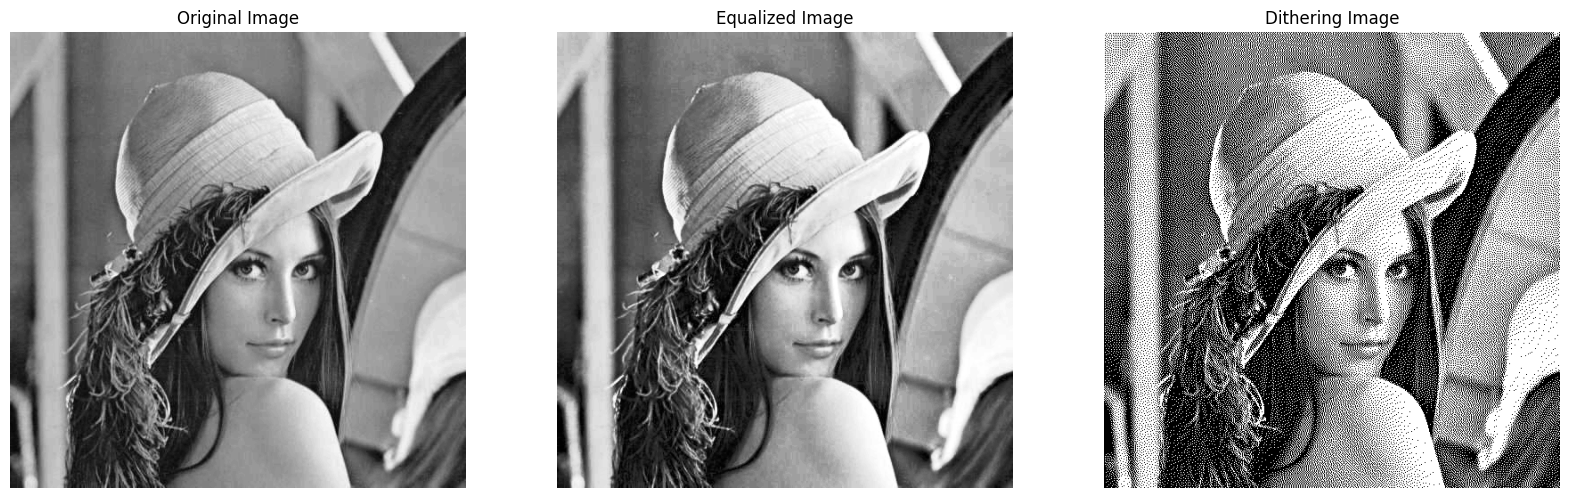

In [13]:
lena_lc = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

lena_lc_gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)

lena_lc_gray_eq = cv.equalizeHist(lena_lc_gray)

lena_lc_gray_eq_dithered = floyd_steinberg_dithering(lena_lc_gray_eq)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(lena_lc_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lena_lc_gray_eq, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lena_lc_gray_eq_dithered, cmap='gray')
plt.axis('off')

plt.show()
